In [1]:
from recipe_snap import * 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# image resizing for display
tfs = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(256)])



/Users/jfachen/opt/miniconda3/envs/recipe_snap/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load RecipeSnap class

In [5]:
def plot_image(image_path):
    img = tfs(Image.open(image_path).convert("RGB"))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def print_recipe(recipe, rank):
    print(f"\nRecipe likelihood rank: {rank}")
    print(f"Title: {recipe['title']}")
    print("Ingredient: ")
    print("\t" + "\n \t".join(recipe['ingredients']))
    print("Instruction: ")
    print("\t" + "\n \t".join(recipe['instructions']))




In [6]:

# Update with your paths and model names, the following are default values
image_dir = '../images'
checkpoint_dir = "../checkpoints/model"
recipe_emb_path = "../data/recipe_embeddings/recipe_embeddings_feats_test.pkl" 
recipe_dict_path = "../data/recipe_dict/test.pkl"

 

In [7]:
rs = RecipeSnap(checkpoint_dir=checkpoint_dir)
rs.load_image_encoder()
rs.load_recipe_lib(recipe_emb_path=recipe_emb_path, recipe_dict_path=recipe_dict_path)
results = rs.predict(image_dir=image_dir)



Loading checkpoint from ... ../checkpoints/model
Loading checkpoint succeed.
image encoder 3535616
Succeed to load recipe embedding from ... ../data/recipe_embeddings/recipe_embeddings_feats_test.pkl
Recipe embedding shape: (102741, 1024)
Succeed to load recipe library from ... ../data/recipe_dict/test.pkl
Recipe library size 154045
3 image loaded


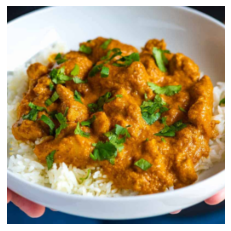


Recipe likelihood rank: 0
Title: indian-spiced chicken
Ingredient: 
	1 1/2 pounds boneless skinless chicken breasts
 	1 cup whole milk plain yogurt
 	3 large cloves garlic, pressed
 	1 -inch piece ginger, grated
 	8 cardamom pods, cracked with the back of a chef's knife
 	1 tablespoon curry powder
 	1/2 teaspoon dried red chili flakes
 	2 teaspoons ground coriander
 	1 tablespoon sweet paprika
 	2 tablespoons honey
 	1 teaspoon salt
 	20 grinds black pepper
 	3 tablespoons vegetable oil
 	1 medium onion, cut into medium dice
 	3 tablespoons tomato paste
 	2 cups half-and-half
 	basmati rice, for serving
Instruction: 
	cut the chicken breasts roughly into 2 by 2-inch pieces.
 	mix together the yogurt, garlic, ginger, cardamom, curry powder, chili flakes, coriander, paprika, honey, salt, and pepper until thoroughly combined.
 	add chicken pieces to yogurt mixture, cover, and refrigerate at least 1 hour or as long as overnight.
 	bring to room temperature before cooking.
 	in a large ski

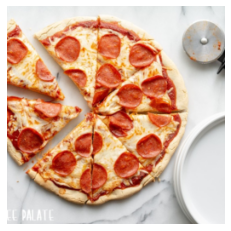


Recipe likelihood rank: 0
Title: easy as a mix pizza recipe
Ingredient: 
	1 pkg. active dry yeast
 	1 c. hot water (110 degrees)
 	2 1/2 c. flour
 	2 tbsp. veg. oil
 	1 teaspoon sugar
 	pizza sauce
 	meat topping
 	shredded mozzarella cheese
 	other favorite pizza toppings
Instruction: 
	dissolve yeast in hot water.
 	stir in flour, oil and sugar.
 	beat about 25 strokes.
 	cover and let rest about 5 min.
 	divide dough in half, with greased fingers, spread each half very thinly on a greased 15"x10"x1" pizza pan.
 	cover with sauce.
 	add in other desired toppings.
 	bake at 425 degrees for 15 to 20 min.
 	(if you want a more crispy crust, pre-bake crust 8 to 10 min, add in toppings, bake 10 min more.)

Recipe likelihood rank: 1
Title: tomato tart
Ingredient: 
	1 head garlic
 	3 tablespoons extra-virgin olive oil
 	all-purpose flour, for dusting
 	1/2 recipe pate brisee (page 224)
 	3/4 cup grated italian fontina cheese (about 3 ounces)
 	1 1/2 pounds ripe but firm tomatoes (about 4 m

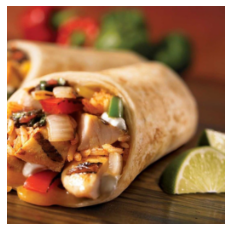


Recipe likelihood rank: 0
Title: k-uesadilla recipe hannaone
Ingredient: 
	4 burrito size or 6 soft taco size fresh flour or corn tortillas
 	1/2 pound korean style grilled chicken, beef, or pork
 	3 medium slices (1/8th inch) white or yellow onion
 	2 jalapeno peppers
 	2 red chili peppers
 	2 ounces cheddar cheese, shredded
 	3 tablespoons fresh kimchi
 	2 ounces pepper jack cheese, shredded
 	6 garlic cloves
 	2 sheets korean nori (roasted seaweed)
 	2 medium slices (1/8 to 1/4 inch) onion
 	3 tablespoons soy sauce
 	3 tablespoons water
 	1 tablespoon sugar
 	1 tablespoon honey
 	1 teaspoon pure toasted (roasted) sesame seed oil
 	1/4 inch knob fresh ginger
 	3 cloves fresh garlic
 	2 slices (1/8th inch thick) of halved asian pear or sweet apple, or 1 tablespoon unsweetened apple juice
 	2 fresh red chili peppers
 	1 tablespoon very fine ground red chili pepper powder
Instruction: 
	place all ingredients (except ground chili powder if making spicy version) in a blender and liquefy.

In [8]:
for img, recipes in results.items():
    plot_image(os.path.join(image_dir, img))
    # print(f"Image {img}")
    for i, recipe in enumerate(recipes):
        print_recipe(recipe, i)

### Add new recipe to recipe library

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jfachen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
new_recipes = [{"title":"Pan-Fried Chinese Pancakes",
                    "ingredients":["1/4 teaspoon salt", "3/4 cup warm water"], 
                    "instructions":["Dissolve salt in warm water, and mix in 1 cup of flour to make a soft dough. Turn the dough out onto a well-floured work surface, and knead until slightly springy, about 5 minutes. If the dough is sticky, knead in 1/4 teaspoon of vegetable oil. Divide the dough into 8 equal-size pieces, and keep the pieces covered with a cloth",
                    "In a bowl, mix 1/4 cup of flour with 1 tablespoon vegetable oil to make a mixture like fine crumbs."]}
                    ]

In [11]:
rs.load_recipe_encoder()
rs.update_recipe_lib(new_recipes=new_recipes)

Loading recipe encoder ...
Loading recipe encoder succeed.
image encoder 41572864
Updating recipe lib ...
Before update, there are 154045 recipes in library
1 recipe loaded
After update, there are 154046 recipes in library


In [12]:
rs.save_recipe_lib(new_recipe_emb_path="../data/recipe_embeddings/new_recipe_embeddings.pkl",
                new_recipe_dict_path="../data/recipe_dict/new_recipe.pkl")